<a href="https://colab.research.google.com/github/ricardoricrob76/machinelearning/blob/main/Aula01_Fundamentos_de_IA_Pr%C3%A1ticas-P7Noite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerando Modelo de Machine Learning (Classificação)
# Autor: Ricardo Roberto de Lima - Data: 28/02/2024.
# Preparação dos Dados e Treinamento do Modelo de Machine Learning - Parte 1.

In [2]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
#Carrega o dataset com os dados para o treinamento e validacao
df = pd.read_csv("dados_mamiferos_treino.csv", encoding="utf-8")

In [6]:
# Exibindo as primeiras linhas do DF.
df.head(10)

,ID,nome,sangue,bota_ovo,voa,mora_agua,classificacao
0,1,humano,1,2,2,2,1
1,2,cobra,2,1,2,2,0
2,3,baleia,1,2,2,1,1
3,4,sapo,1,1,2,3,0
4,5,morcego,1,2,1,2,1
5,6,pombo,1,1,1,2,0
6,7,gato,1,2,2,2,1
7,8,tartaruga,2,1,2,3,0
8,9,pinguim,1,1,2,3,0
9,10,porco-espinho,1,2,2,2,1


In [5]:
df.tail()

,ID,nome,sangue,bota_ovo,voa,mora_agua,classificacao
11,12,salamandra,2,1,2,3,0
12,13,coruja,1,1,1,2,0
13,14,golfinho,1,2,2,1,1
14,15,águia,1,1,1,2,0
15,16,ornitorrinco,1,1,2,2,1


In [12]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df[['sangue', 'bota_ovo', 'voa', 'mora_agua']])
#Definição do atributo de classificacao
data_classif = np.array(df['classificacao'])

In [8]:
# Verificando o formato dos dados
df.shape

(16, 7)

In [9]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

<ipython-input-9-7d75fc3faa23>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


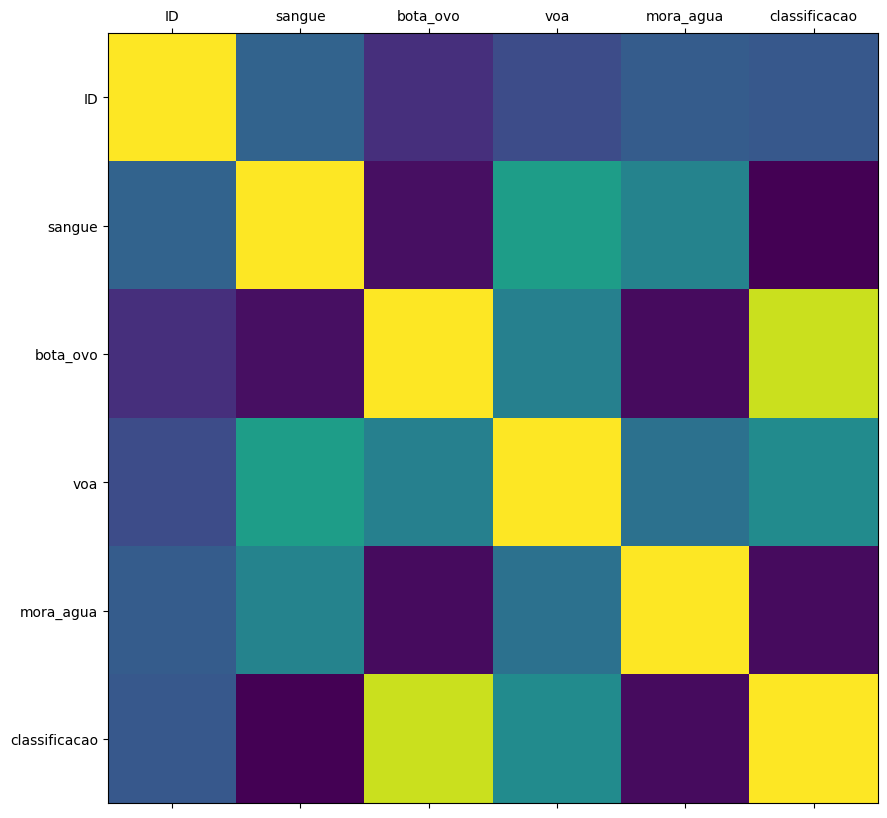

In [10]:
# Criando o gráfico
plot_corr(df)

In [13]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.38)

In [14]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[1 2 2 2]
 [1 2 2 1]
 [2 1 2 1]
 [1 1 1 2]
 [1 1 1 2]
 [1 2 2 2]
 [1 1 2 3]
 [1 2 1 2]
 [1 2 2 1]]
Conjunto de Validacao
[[2 1 2 3]
 [1 2 2 2]
 [1 1 1 2]
 [1 1 2 2]
 [1 1 2 3]
 [2 1 2 2]
 [2 1 2 3]]
-----------------------


In [15]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [16]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
1.0
Na Base de Treinamento


In [17]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste e ou Validação")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.8571428571428571
na Base de Teste e ou Validação
